In [ ]:
!pip install pandas-alive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0


In [ ]:
import pandas as pb
import pandas_alive
import numpy as np
import matplotlib as plt

In [ ]:
#@title #1. Library { display-mode: "form" }
!pip install colorspacious
import os
import re
import math
import warnings
import numpy as np
import pandas as pd
import gspread as gs
import seaborn as sns
from google.colab import files, drive, auth
from google.auth import default
from collections import Counter
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from scipy.interpolate import make_interp_spline
from matplotlib import cm
from colorspacious import cspace_converter
import matplotlib as mpl # modificar parametros de graficos
import plotly.express as px
import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

cmaps = {}
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    return cmap_list

# cmap = plot_color_gradients('Perceptually Uniform Sequential',['plasma'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


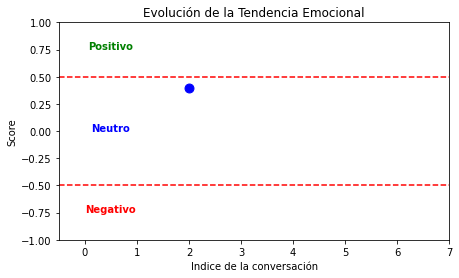

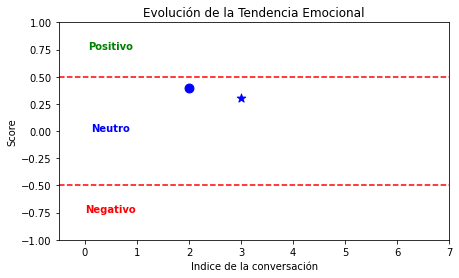

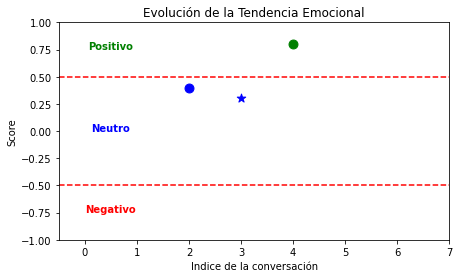

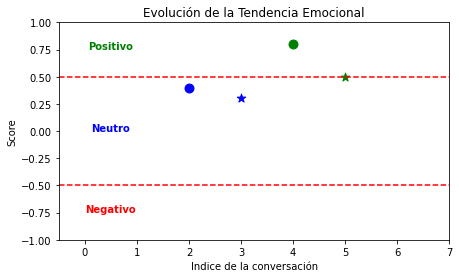

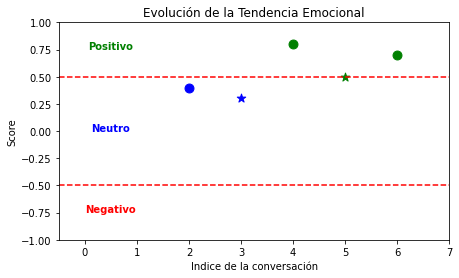

In [ ]:
conv_pos_ = [0.4, 0.3, 0.8, 0.5, 0.7]
scatter_y_ = [0.4, 0.3, 0.8, 0.5, 0.7]

for figk in range(len(conv_pos_)):
  conv_pos = conv_pos_[:figk+1]
  scatter_x = np.array(range(2,len(conv_pos)+2))
  scatter_y = scatter_y_[:figk+1]
  group = []
  for x in conv_pos:
    if (x >= 0.5):
      group.append(1)
    elif (x <= -0.5):
      group.append(3)
    else:
      group.append(2)

  cdict = {1: 'green', 2: 'blue', 3: 'red'}

  fig, ax = plt.subplots(figsize=(7,4)) # figsize=(9,7)
  for g in scatter_x-2:
    if scatter_y[g] >= 0.5:
      d = 1
      l = 1
    elif scatter_y[g] <= -0.5:
      d = 3
      l = 3
    else:
      d = 2
      l = 2
    if g%2 == 0:
      ax.scatter(scatter_x[g], scatter_y[g], c = cdict[d], label = l, s = 80)
      # ax.scatter(scatter_x[g], scatter_y[g], c = cdict[g], label = g, s = 80)
    else:
      # ax.scatter(scatter_x[g], scatter_y[g], c = cdict[g], label = g, s = 80, marker='*')
      ax.scatter(scatter_x[g], scatter_y[g], c = cdict[d], label = l, s = 80, marker='*')

  # leg = ax.legend(loc="upper left", bbox_to_anchor=(1,1), labels=['Agente POS', 'Cliente POS','Agente NEU', 'Cliente NEU']) #

  # colors = []
  # for i in range(4):
  #     line, = ax.plot(i, i, label='$y = %ix$' % i)
  #     if i == 0:
  #       colors.append(plt.getp(line,'color'))
  #     elif i == 1:
  #       colors.append(plt.getp(line,'color'))


  # for color,text in zip(colors,leg.get_texts()):
  #     text.set_color(color)
  plt.text(0.5, 0.75, 'Positivo', ha='center', color = 'green', weight='bold')
  plt.text(0.5, 0, 'Neutro', ha='center', color = 'blue', weight='bold')
  plt.text(0.5, -0.75, 'Negativo', ha='center', color = 'red', weight='bold')
  plt.ylabel('Score')
  plt.xlabel('Indice de la conversación')
  plt.title('Evolución de la Tendencia Emocional')
  plt.ylim([-1, 1])
  plt.xlim([-0.5, 7])
  plt.axhline(y = 0.5, color = 'r', linestyle = '--')
  plt.axhline(y = -0.5, color = 'r', linestyle = '--')
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/fig'+str(figk+1)+'.png')
  plt.show()


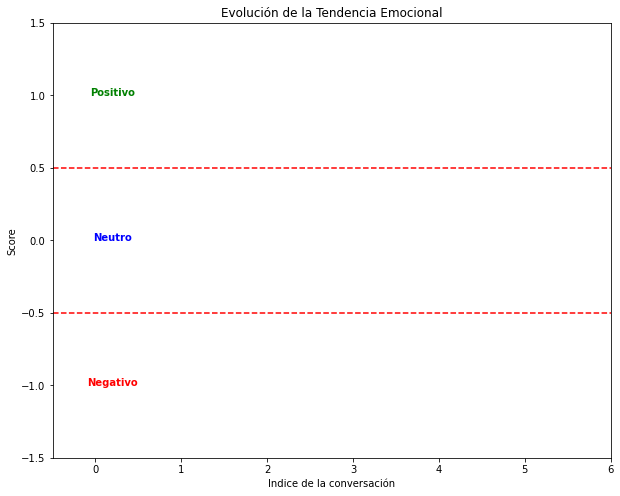

In [ ]:
conv_pos_ = [0.8, 0.5, 0.4, 0.4]#[0.4, 0.4, 0.4, 0.4, 0.3, 0.5, 0.1, 0.9, 0.4, 0.8, 0.5, 0.7]
scatter_y_ = [0.8, 0.5, 0.4, 0.4]#[0.4, 0.4, 0.4, 0.4, 0.3, 0.5, 0.1, 0.9, 0.4, 0.8, 0.5, 0.7]

# for figk in range(len(conv_pos_)):
conv_pos = conv_pos_#[:figk+1]
scatter_x = np.array(range(2,len(conv_pos)+2))
scatter_y = scatter_y_#[:figk+1]
group = []
for x in conv_pos:
  if (x >= 0.5):
    group.append(1)
  elif (x <= -0.5):
    group.append(3)
  else:
    group.append(2)

cdict = {1: 'green', 2: 'blue', 3: 'red'}

fig, ax = plt.subplots(figsize=(10,8)) # figsize=(9,7)
# for g in scatter_x-2:
#   if scatter_y[g] >= 0.5:
#     d = 1
#     l = 1
#   elif scatter_y[g] <= -0.5:
#     d = 3
#     l = 3
#   else:
#     d = 2
#     l = 2
#   if g%2 == 0:
#     ax.scatter(scatter_x[g], scatter_y[g], c = cdict[d], label = l, s = 80, marker='*')
#     # ax.scatter(scatter_x[g], scatter_y[g], c = cdict[g], label = g, s = 80)
#   else:
#     # ax.scatter(scatter_x[g], scatter_y[g], c = cdict[g], label = g, s = 80, marker='*')
#     ax.scatter(scatter_x[g], scatter_y[g], c = cdict[d], label = l, s = 80)

# leg = ax.legend(loc="upper left", bbox_to_anchor=(1,1), labels=['Agente POS', 'Cliente POS','Agente NEU', 'Cliente NEU']) #

# colors = []
# for i in range(4):
#     line, = ax.plot(i, i, label='$y = %ix$' % i)
#     if i == 0:
#       colors.append(plt.getp(line,'color'))
#     elif i == 1:
#       colors.append(plt.getp(line,'color'))


# for color,text in zip(colors,leg.get_texts()):
#     text.set_color(color)
plt.text(0.2, 1, 'Positivo', ha='center', color = 'green', weight='bold')
plt.text(0.2, 0, 'Neutro', ha='center', color = 'blue', weight='bold')
plt.text(0.2, -1, 'Negativo', ha='center', color = 'red', weight='bold')
plt.ylabel('Score')
plt.xlabel('Indice de la conversación')
plt.title('Evolución de la Tendencia Emocional')
plt.ylim([-1.5, 1.5])
plt.xlim([-0.5, 6])
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.axhline(y = -0.5, color = 'r', linestyle = '--')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/fig4.png')
plt.show()


In [ ]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in ['1.png', '2.png', '3.png', '4.png']:
        image = imageio.imread(filename)
        writer.append_data(image)